# Step 1: Import Libraries


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, joblib

## Load Dataset

In [50]:
df = pd.read_csv("global_startup_success_dataset.csv")


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Startup Name              5000 non-null   object 
 1   Founded Year              5000 non-null   int64  
 2   Country                   5000 non-null   object 
 3   Industry                  5000 non-null   object 
 4   Funding Stage             5000 non-null   object 
 5   Total Funding ($M)        5000 non-null   int64  
 6   Number of Employees       5000 non-null   int64  
 7   Annual Revenue ($M)       5000 non-null   int64  
 8   Valuation ($B)            5000 non-null   float64
 9   Success Score             5000 non-null   int64  
 10  Acquired?                 5000 non-null   object 
 11  IPO?                      5000 non-null   object 
 12  Customer Base (Millions)  5000 non-null   int64  
 13  Tech Stack                5000 non-null   object 
 14  Social M

In [52]:
df.head()

,Startup Name,Founded Year,Country,Industry,Funding Stage,Total Funding ($M),Number of Employees,Annual Revenue ($M),Valuation ($B),Success Score,Acquired?,IPO?,Customer Base (Millions),Tech Stack,Social Media Followers
0,Startup_1,2009,Canada,Healthcare,Series A,269,3047,104,46.11,5,No,No,43,"Java, Spring",4158814
1,Startup_2,2004,UK,Healthcare,IPO,40,630,431,33.04,1,No,Yes,64,"Node.js, React",4063014
2,Startup_3,2018,USA,Healthcare,Seed,399,2475,375,15.79,8,No,No,74,"PHP, Laravel",3449855
3,Startup_4,2014,France,Tech,Seed,404,1011,907,17.12,7,Yes,Yes,26,"Python, AI",630421
4,Startup_5,2006,Japan,Energy,Series C,419,3917,280,4.39,6,Yes,Yes,30,"Node.js, React",365956


##  2. Data Preprocessing

In [53]:
# Drop irrelevant columns
df.drop(columns=['Startup Name'], inplace=True,errors='ignore')

In [54]:
# Encode binary columns
df['Acquired?'] = df['Acquired?'].map({'Yes': 1, 'No': 0})
df['IPO?'] = df['IPO?'].map({'Yes': 1, 'No': 0})

In [55]:
# Process Tech Stack - count of technologies used
df['Tech Stack Count'] = df['Tech Stack'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
df.drop(columns=['Tech Stack'], inplace=True)


In [56]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Country', 'Industry', 'Funding Stage'], drop_first=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Founded Year              5000 non-null   int64  
 1   Total Funding ($M)        5000 non-null   int64  
 2   Number of Employees       5000 non-null   int64  
 3   Annual Revenue ($M)       5000 non-null   int64  
 4   Valuation ($B)            5000 non-null   float64
 5   Success Score             5000 non-null   int64  
 6   Acquired?                 5000 non-null   int64  
 7   IPO?                      5000 non-null   int64  
 8   Customer Base (Millions)  5000 non-null   int64  
 9   Social Media Followers    5000 non-null   int64  
 10  Tech Stack Count          5000 non-null   int64  
 11  Country_Brazil            5000 non-null   bool   
 12  Country_Canada            5000 non-null   bool   
 13  Country_China             5000 non-null   bool   
 14  Country_

## 3. Exploratory Data Analysis (EDA)

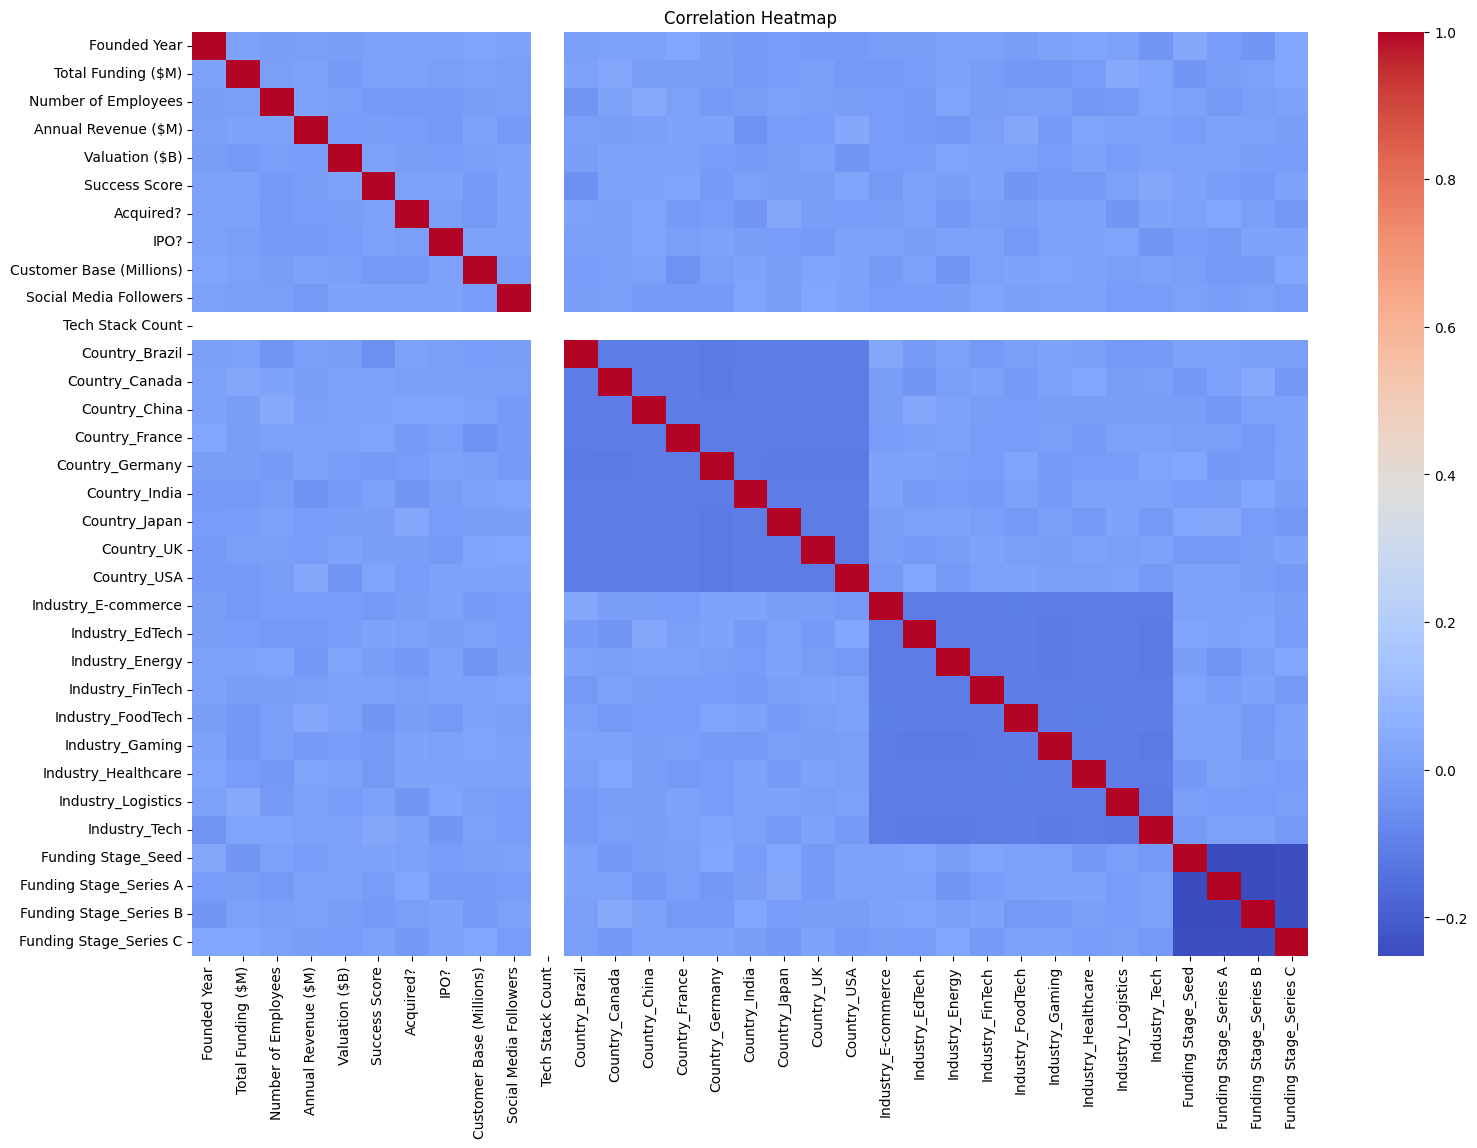

In [58]:
# Correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

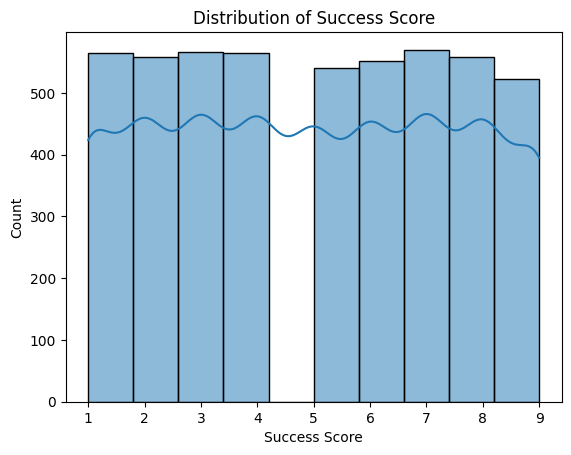

In [59]:
# Distribution of target
sns.histplot(df['Success Score'], bins=10, kde=True)
plt.title("Distribution of Success Score")
plt.xlabel("Success Score")
plt.ylabel("Count")
plt.show()

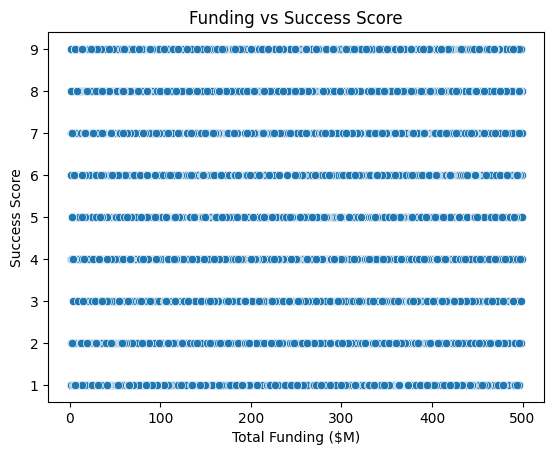

In [60]:
# Scatter example: Funding vs Success
sns.scatterplot(x='Total Funding ($M)', y='Success Score', data=df)
plt.title("Funding vs Success Score")
plt.show()

## 4. Feature Scaling & Splitting

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
# Features and target
X = df.drop(columns=['Success Score'])
y = df['Success Score']

In [63]:
# Save input columns
joblib.dump(X.columns.tolist(), "input_columns.pkl")

['input_columns.pkl']

In [64]:
print("Training features:", X.columns.tolist())

Training features: ['Founded Year', 'Total Funding ($M)', 'Number of Employees', 'Annual Revenue ($M)', 'Valuation ($B)', 'Acquired?', 'IPO?', 'Customer Base (Millions)', 'Social Media Followers', 'Tech Stack Count', 'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Japan', 'Country_UK', 'Country_USA', 'Industry_E-commerce', 'Industry_EdTech', 'Industry_Energy', 'Industry_FinTech', 'Industry_FoodTech', 'Industry_Gaming', 'Industry_Healthcare', 'Industry_Logistics', 'Industry_Tech', 'Funding Stage_Seed', 'Funding Stage_Series A', 'Funding Stage_Series B', 'Funding Stage_Series C']


In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  5. Model Training & Evaluation

In [67]:

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

In [68]:
# Train all models

rf_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [69]:

rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [70]:
# Predict

rf_pred = rf_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

In [71]:
# R² scores

r2_rf = r2_score(y_test, rf_pred)
r2_xgb = r2_score(y_test, xgb_pred)
print(f"Random Forest R²: {r2_rf:.3f}")
print(f"XGBoost R²: {r2_xgb:.3f}")

Random Forest R²: -0.063
XGBoost R²: -0.236


In [72]:
# Select best
if r2_xgb > r2_rf:
    best_model = xgb_model
    print("✅ Selected: XGBoost")
else:
    best_model = rf_model
    print("✅ Selected: Random Forest")


# Save best model
pickle.dump(best_model, open("model.pkl", "wb"))

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

✅ Selected: Random Forest
